# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Mekayle, Rajoo**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.correlation import plot_corr
from sklearn import metrics
import seaborn as sn
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv("df_train.csv")
df.head(10)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


We see that Valencia Pressure is the only column that has missing values:

In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Valencia_pressure    2068
dtype: int64

Next we find the columns that have a considerable Kurtosis (|kurtosis|>3) and level of Skew (|skew|>1)

In [5]:
# plot relevant feature interactions
outliers = df.kurtosis()[abs(df.kurtosis())>3].index.tolist()
skewed = df.skew()[abs(df.skew())>1].index.tolist()

print("Columns that are highly skewed:",skewed,"\n")
print("Columns that have considerable outliers:",outliers)

Columns that are highly skewed: ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Barcelona_wind_speed', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Valencia_pressure', 'Madrid_pressure', 'Bilbao_weather_id'] 

Columns that have considerable outliers: ['Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id']


C:\Users\F5480426\AppData\Local\Temp/ipykernel_17708/2887511135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outliers = df.kurtosis()[abs(df.kurtosis())>3].index.tolist()
C:\Users\F5480426\AppData\Local\Temp/ipykernel_17708/2887511135.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewed = df.skew()[abs(df.skew())>1].index.tolist()


Lets us now see the correlation between our predictor variables and our response variable:

In [6]:
df.corr()["load_shortfall_3h"]

Unnamed: 0              0.192612
Madrid_wind_speed      -0.150981
Bilbao_rain_1h         -0.152510
Valencia_wind_speed    -0.142791
Seville_humidity       -0.167290
Madrid_humidity        -0.150536
Bilbao_clouds_all      -0.127293
Bilbao_wind_speed      -0.081602
Seville_clouds_all     -0.091804
Bilbao_wind_deg        -0.120800
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Madrid_clouds_all      -0.081623
Seville_wind_speed     -0.048433
Barcelona_rain_1h      -0.056633
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Barcelona_pressure     -0.034385
Seville_rain_3h        -0.032945
Madrid_rain_1h         -0.027159
Barcelona_rain_3h      -0.024720
Valencia_snow_3h       -0.021633
Madrid_weather_id       0.030868
Barcelona_weather_id    0.063868
Bilbao_pressure         0.039052
Seville_weather_id      0.061104
Valencia_pressure       0.086022
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_temp_max       0.144270
Valencia_t

We then store the variables that have a low correlation in a list to our target variable, i.e., |correlation|<0.1 : 

In [7]:
corr_col=df.corr()["load_shortfall_3h"][abs(df.corr()["load_shortfall_3h"])<0.1].index.tolist()

Let us also evaluate the relationships between our predictor variables and themselves. A high correlation can pose collinearity issues in our model down the line:

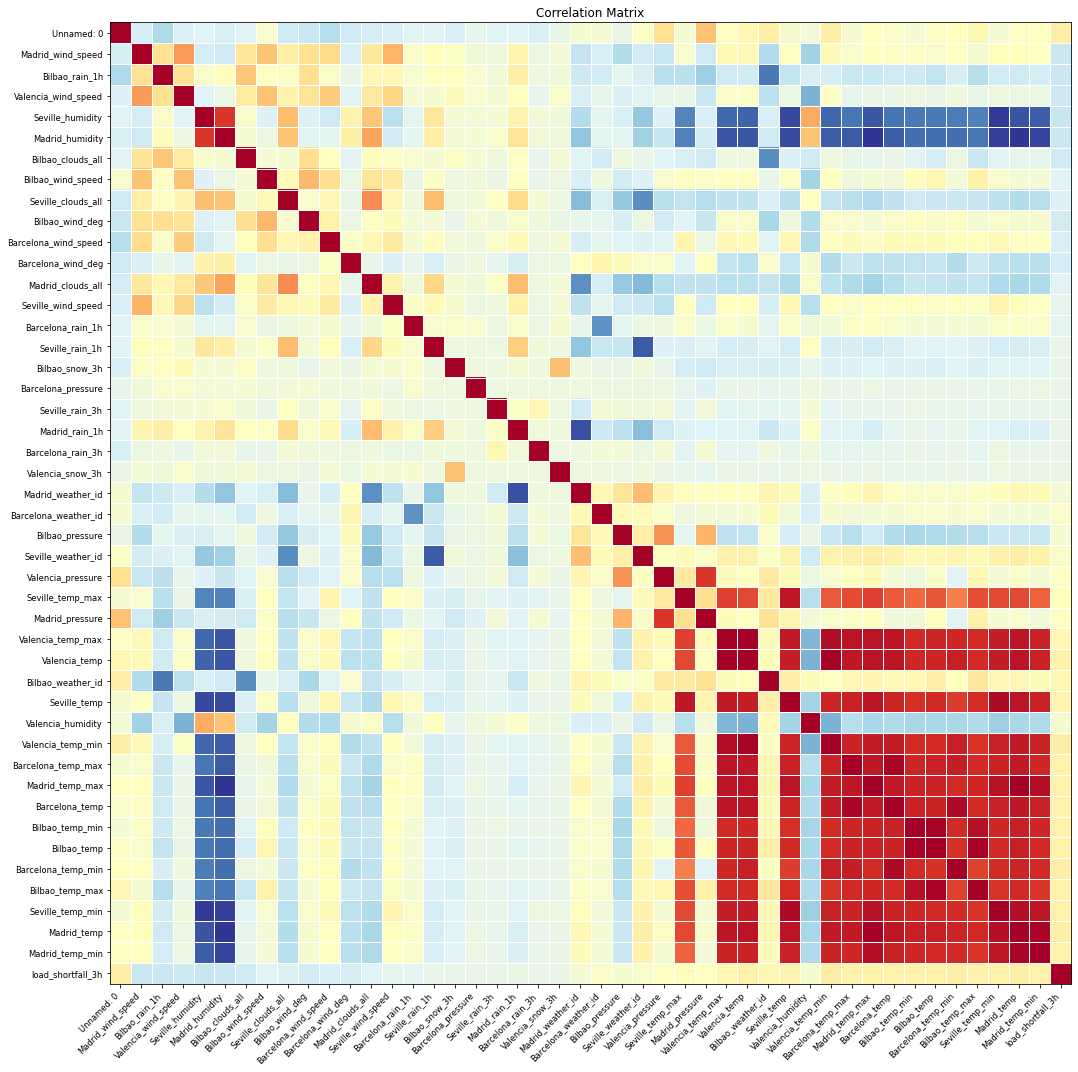

In [8]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

from the correlation table above we see that the temp min and max variables all have a significant correlation between each other with most of them being above 0.8. We also store these variables in a list:

In [9]:
min_max = []
for col in df.columns.tolist():
    if "max" in col.split("_") or "min" in col.split("_"):
        min_max.append(col)

We also note that there seems to be a column which seems to be nothing more than a duplicate of the index, "Unnamed: 0", which we remove. Furthermore, "Valencia_wind_deg" and "Seville_pressure" are not measured in the same units as the other "_wind_deg" and "_pressure" columns and with no way to convert them, we will later drop them 

We then produce a box plot to show just how extreme some outliers are:

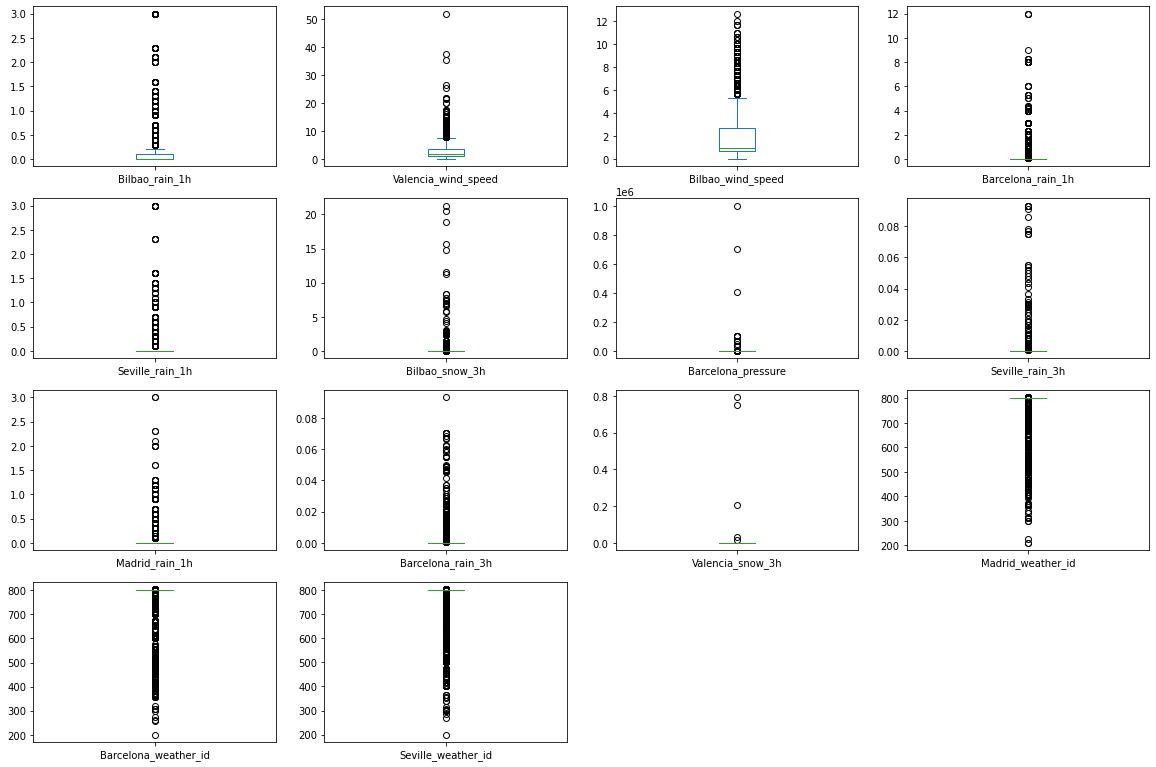

In [36]:
df[outliers].plot(kind = 'box', figsize=(20,70), layout = (20,4), subplots = True, sharex = False)
plt.savefig("output.jpg")
plt.show()


Similarly, we produce density plots for to visualize our skewed data:

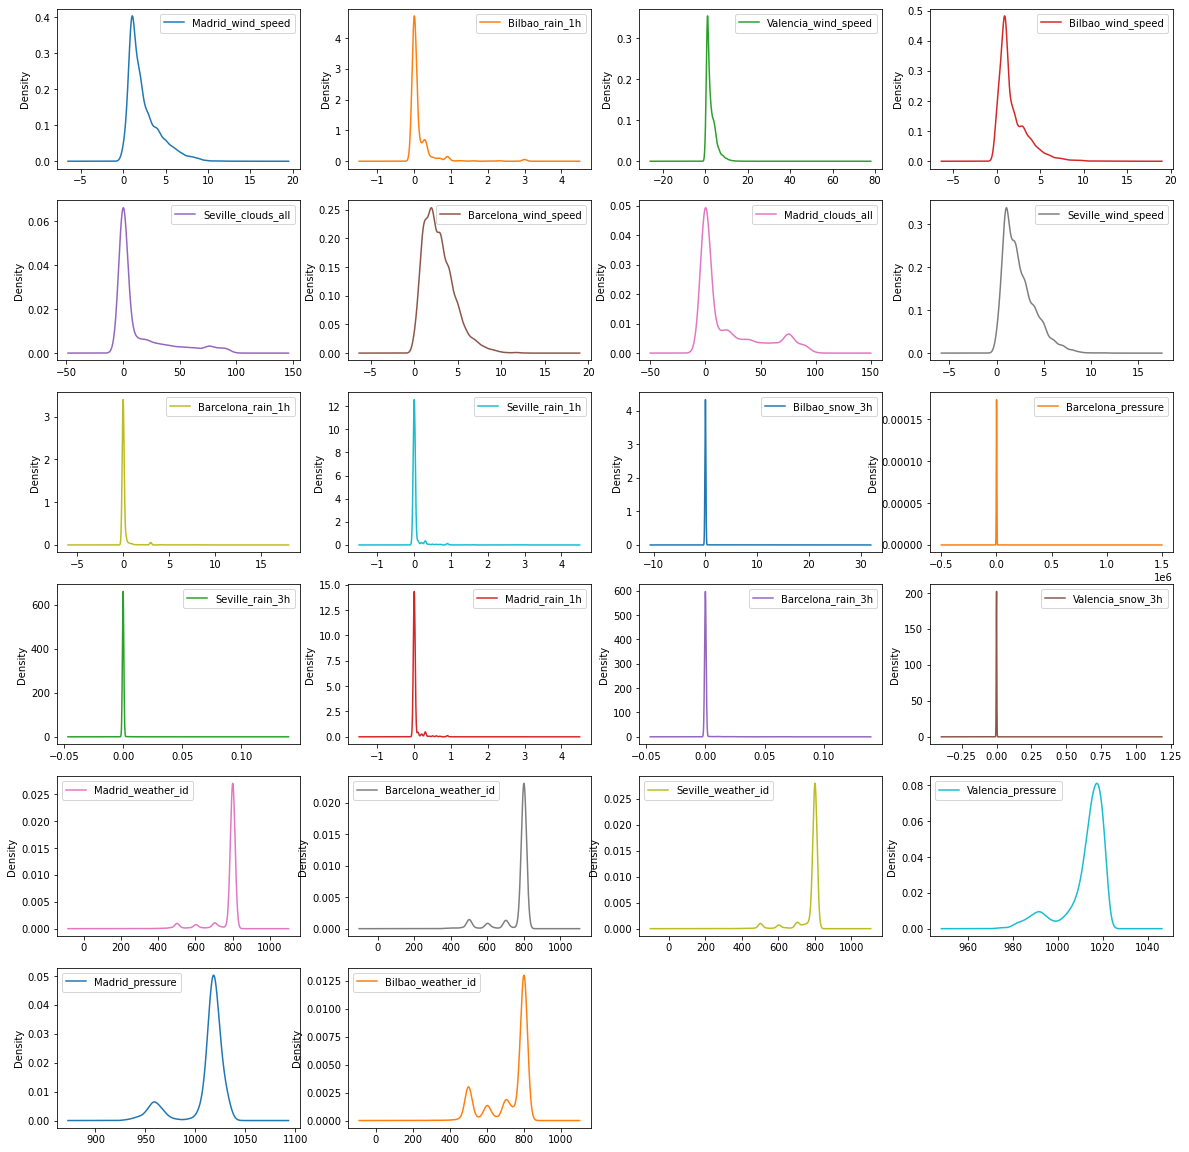

In [11]:
df[skewed].plot(kind = 'density', figsize=(20,70), layout = (20,4), subplots = True, sharex = False)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [12]:
#As we discovered above, Valencia Pressure is the only column with empty values. We replace these values with the mode
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])

In [13]:
#Next we split the time column into year, month, day, hour and minute 
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [14]:
#As mentioned previously, we will drop these columns from our dataframe
df = df.drop(["time", "Unnamed: 0", "Valencia_wind_deg", "Seville_pressure"], axis = 1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

To make the modelling process easier and more efficient we have created a function that takes in a dataframe as well as the specified columns we want to retain and produces the test and train RMSE values from a Linear, Ridge, LASSO, Decision Tree and a Random Forrest regression. 

In [15]:
def model_tester(df,columns, alpha, n_estimators, max_depth, test_size):
    
    df = df[columns] # First we create the dataframe with the specified columns
    
    # Next we create the different regression models
    lm = LinearRegression()
    rg = Ridge()
    lasso = Lasso(alpha = alpha)
    regr_tree = DecisionTreeRegressor(max_depth = max_depth,random_state=0)
    RF = RandomForestRegressor(n_estimators = n_estimators, random_state=0)
    models = [lm,rg,lasso,regr_tree, RF]
    
    #We then split our data into our response and predictor variables
    x = df.drop(["load_shortfall_3h"], axis = 1)
    y = df["load_shortfall_3h"]
    
    #We also create a scaler for our LASSO and Ridge Models
    scaler = StandardScaler()
    scaledx = scaler.fit_transform(x)
    
    #Next we split the data into the training and test set, the X_scaled_train, X_scaled_test will be used in the LASSO and
    #Ridge Models
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=0)
    X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(scaledx, y, test_size = test_size, random_state=0)
    
    #We them fit the relevant data to our various models keeping in mind that LASSO and Ridge need to be fitted with the scaled
    #data
    lm.fit(X_train, y_train)
    rg.fit(X_scaled_train, y_train)
    lasso.fit(X_scaled_train, y_train)
    regr_tree.fit(X_train, y_train)
    RF.fit(X_train,y_train)
    
    # We then predict out y_test values and use the outputs to compute the test/train RMSE values
    RMSE = []
    index = 0
    for model in [lm, regr_tree, RF]:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_rmse = (metrics.mean_squared_error(y_train, y_pred_train))**(1/2)
        test_rmse = (metrics.mean_squared_error(y_test, y_pred_test))**(1/2)
        RMSE.append(test_rmse)
        print(str([lm, regr_tree, RF][index]))
        print('Train RMSE:', train_rmse)
        print('Test RMSE:', test_rmse)
        print("")
        
        index = index + 1
        
    index = 0
    for model in [lasso, rg]:
        y_pred_train = model.predict(X_scaled_train)
        y_pred_test = model.predict(X_scaled_test)
        train_rmse = (metrics.mean_squared_error(y_train, y_pred_train))**(1/2)
        test_rmse = (metrics.mean_squared_error(y_test, y_pred_test))**(1/2)
        RMSE.append(test_rmse)
        print(str([lasso, rg][index]))
        print('Train RMSE:', train_rmse)
        print('Test RMSE:', test_rmse)
        print("")
        
        index = index + 1
    
    #To better visualize the test RMSE values we produce a horizontal bar plot:
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.barh(["Linear Regression", "DecisionTreeRegressor", "RandomForestRegressor", "Lasso", "Ridge"], RMSE)
    ax.set_xlabel("Test_RMSE")
    ax.set_ylabel("Model")
    for index, value in enumerate([round(value,2) for value in RMSE]):
        plt.text(value, index, str(value))

        


We first try removing the variables with a high amount of outliers from the data:

In [16]:
df_outliers = df.drop(outliers, axis = 1)

C:\Users\F5480426\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78163907902.95163, tolerance: 19013102.73631255
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4739.498430481498
Test RMSE: 4807.928039107826

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1519.7488892834817
Test RMSE: 4174.66041199766

RandomForestRegressor(random_state=0)
Train RMSE: 1183.459986465175
Test RMSE: 3126.3327181955065

Lasso(alpha=0.01)
Train RMSE: 4740.215941233942
Test RMSE: 4805.814946197277

Ridge()
Train RMSE: 4739.855347298883
Test RMSE: 4806.05017687479



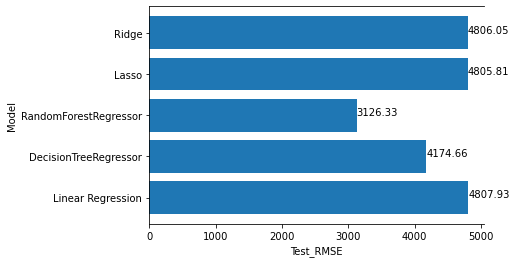

In [17]:
model_tester(df_outliers,df_outliers.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15, test_size = 0.2)

Next, we remove the data with a high amount out skewed data:

In [18]:
df_skewed = df.drop(skewed, axis = 1)

C:\Users\F5480426\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79536705434.5555, tolerance: 19013102.73631255
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4782.332464857041
Test RMSE: 4848.365476330963

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1326.8796736950098
Test RMSE: 4137.44651325847

RandomForestRegressor(random_state=0)
Train RMSE: 1193.5814620768174
Test RMSE: 3175.1304163807727

Lasso(alpha=0.01)
Train RMSE: 4782.9986508167585
Test RMSE: 4847.01859210845

Ridge()
Train RMSE: 4782.644002950693
Test RMSE: 4846.8219847634655



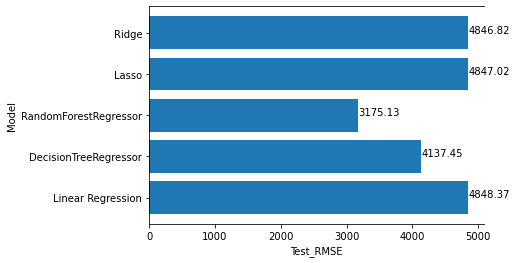

In [19]:
model_tester(df_skewed,df_skewed.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15, test_size = 0.2)

Next lets remove all the temp_min/temp_max values that showed a high level of collinearity:

In [20]:
df_min_max = df.drop(min_max, axis = 1)

LinearRegression()
Train RMSE: 4777.281607363864
Test RMSE: 4852.016927940732

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1357.8214226787013
Test RMSE: 4272.624645189894

RandomForestRegressor(random_state=0)
Train RMSE: 1170.1476857993882
Test RMSE: 3070.62659695101

Lasso(alpha=0.01)
Train RMSE: 4777.281608458234
Test RMSE: 4852.014048716534

Ridge()
Train RMSE: 4777.281683237332
Test RMSE: 4852.0101071111385



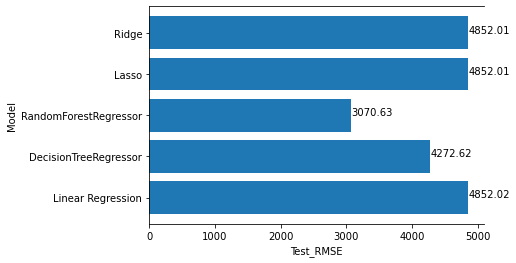

In [21]:
model_tester(df_min_max,df_min_max.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15, test_size = 0.2)

Next we remove the variables that showed a low correlation to our target variable:

In [22]:
df_least_corr = df.drop(corr_col, axis = 1)

C:\Users\F5480426\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78505091176.66289, tolerance: 19013102.73631255
  model = cd_fast.enet_coordinate_descent(


LinearRegression()
Train RMSE: 4749.031558114183
Test RMSE: 4816.656987383793

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1502.5795054286427
Test RMSE: 4340.609489217882

RandomForestRegressor(random_state=0)
Train RMSE: 1204.582959342332
Test RMSE: 3200.5452145605745

Lasso(alpha=0.01)
Train RMSE: 4749.820828693225
Test RMSE: 4814.462296267329

Ridge()
Train RMSE: 4749.426363290706
Test RMSE: 4814.823447766256



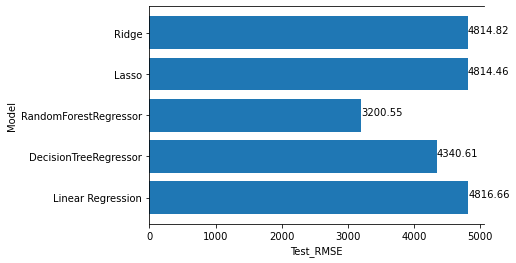

In [23]:
model_tester(df_least_corr,df_least_corr.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15, test_size = 0.2)

Thus far, the best model we were able to produce was by removing the temp_min/temp_max columns. We now try to tweak this model inorder to lower the RMSE and thus increase the accuracy of the model. 
To figure out which columns we can further remove inorder to decrease the RMSE we have written a function that works in the following way:

1) Removes a column

2) Outputs the RMSE

2) Add the column back

3) Goes back to step one

By doing this we are able to see which drop in column decreases the RMSE value. We then drop the column that produced the lowest RMSE value and repeat the process.

I have written the code below but have skipped the use of it in this notebook due to the computation power is uses in calculating the RMSE values 30+ times. However, I have written the dataframe that resulted in the use of the function just below it:

def rmse_loop(df):
    
    x = df.drop(["load_shortfall_3h"], axis = 1)
    y = df["load_shortfall_3h"]

    for col in df.columns.tolist():
        if col != "load_shortfall_3h":
            x1 = x.drop([col], axis = 1)
            RF = RandomForestRegressor(n_estimators = 100, random_state=0, n_jobs = -1)
            X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=1)
            RF.fit(X_train,y_train)
            y_pred_train = RF.predict(X_train)
            y_pred_test = RF.predict(X_test)
            print("Removing ", col,":")
            print('Train RMSE:', (metrics.mean_squared_error(y_train, y_pred_train))**(1/2))
            print('Test RMSE:', (metrics.mean_squared_error(y_test, y_pred_test))**(1/2))
            print(' ')
            x1 = x
            
The resulting dataframe:

In [24]:
df_function = df.drop(["minute", "Barcelona_temp_min","Bilbao_temp_min", "Bilbao_temp", 'Seville_temp_max','Valencia_temp_max',
 'Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min', "Bilbao_wind_deg"], axis = 1)

We then test this using our model_tester() function

LinearRegression()
Train RMSE: 4777.128233331622
Test RMSE: 4857.029119117744

DecisionTreeRegressor(max_depth=15, random_state=0)
Train RMSE: 1255.98247541345
Test RMSE: 4172.553836318665

RandomForestRegressor(random_state=0)
Train RMSE: 1165.4900901855774
Test RMSE: 3050.8698060604725

Lasso(alpha=0.01)
Train RMSE: 4777.128235472613
Test RMSE: 4857.024482122576

Ridge()
Train RMSE: 4777.12883771564
Test RMSE: 4856.954285602505



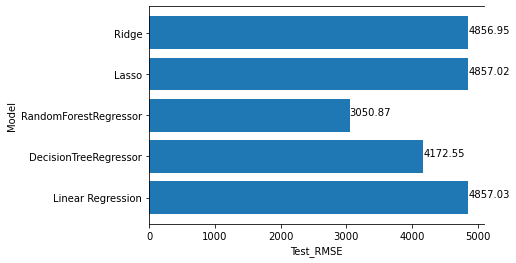

In [25]:
model_tester(df_function,df_function.columns.tolist(), alpha = 0.01, n_estimators = 100, max_depth = 15, test_size = 0.2)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

# Compare model performance

The best model perfomance we obtained was by using the df_function dataframe where we dropped the following set of variables: 

"time", "Unnamed: 0", "Valencia_wind_deg", "Seville_pressure","minute", "Barcelona_temp_min","Bilbao_temp_min", "Bilbao_temp", 'Seville_temp_max','Valencia_temp_max','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min', "Bilbao_wind_deg" 

We fitted 5 different models to this subset of data namely LinearRegression(), Lasso(), Ridge(), DecisionTree() and RandomForest and obtained the following results : 

    - LinearRegression()- Test RMSE: 4857.029119117744

    - DecisionTreeRegressor(max_depth=15, random_state=0) - Test RMSE: 4172.553836318665

    - RandomForestRegressor(random_state=0) - Test RMSE: 3050.8698060604725

    - Lasso(alpha=0.01) - Test RMSE: 4857.024482122576

    - Ridge() - Test RMSE: 4856.954285602505


<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://i.ibb.co/tcq4svW/Screenshot-45.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
</div>

Given the results above, we have decided the best model would be a Random Forest regression with an n_estimators of 100 while dropping the variables mentioned above.
In general, Random Forests are one of the more powerful regressions a Data Scientist can perform. They work great with higher dimentional data, they are not affected by outliers, they are indifferent to non-linear data and also a lot less prone to overfitting. All of these characteristics coupled with the RMSE value we obtained we are confident in saying that this is our best performing model.

The final model is below: 

In [26]:
RF = RandomForestRegressor(n_estimators = 100, random_state=0)
df_final = df.drop(["minute", "Barcelona_temp_min","Bilbao_temp_min", "Bilbao_temp", 'Seville_temp_max','Valencia_temp_max',
 'Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min', "Bilbao_wind_deg"], axis = 1)
x = df_final.drop(["load_shortfall_3h"], axis = 1)
y = df_final["load_shortfall_3h"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
RF.fit(X_train,y_train)


y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)
train_rmse = (metrics.mean_squared_error(y_train, y_pred_train))**(1/2)
test_rmse = (metrics.mean_squared_error(y_test, y_pred_test))**(1/2)

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1165.4900901855774
Test RMSE: 3050.8698060604725


Next we pickle this model inorder to use it elsewhere:

In [27]:
model_save_path = "JS2.pkl"
with open(model_save_path,"wb") as file:
    pickle.dump(RF,file)

Next we fit this model onto the test_data inorder to make predictions for the load_shortfall_3h:

In [28]:
test_df = pd.read_csv('df_test.csv')
test_df1 = test_df.copy()

Before we fit the model onto this data we need to first clean the data in the same way we cleaned the df_train data:

In [29]:
test_df['Valencia_pressure'] = test_df['Valencia_pressure'].fillna(test_df['Valencia_pressure'].mode()[0])
test_df['time'] = pd.to_datetime(test_df['time'], format='%Y-%m-%d %H:%M:%S')

test_df['year'] = test_df['time'].dt.year
test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day
test_df['hour'] = test_df['time'].dt.hour
test_df['minute'] = test_df['time'].dt.minute

test_x = test_df.drop(["time", "Unnamed: 0", "Valencia_wind_deg", "Seville_pressure","minute", "Barcelona_temp_min","Bilbao_temp_min", "Bilbao_temp", 'Seville_temp_max','Valencia_temp_max',
 'Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min', "Bilbao_wind_deg"], axis = 1)

testpred = RF.predict(test_x).tolist()
dicts = {"time": test_df1["time"].tolist(), "load_shortfall_3h": testpred}
subs = pd.DataFrame(dicts)
subs = subs.set_index("time")
subs.to_csv("Final_JS2Submission.csv")

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Our best performing model on all our subsets of data has proven to be the Random Forest Regression Model but before we understand how this model works it is crucial to understand how a Decision Tree Regression functions.

As the name suggests, a Decision Tree is a tree-like graph with "nodes" representing the place where we pick an attribute and ask a question about that attribute in the attempt to learn simple decision rules that we can use to make predictions.

As you may have guessed, a Random Forest is constructed by combining a multitude of decision trees and outputting the mean/mode of the predictions of the individual trees, this does require more computation, however, the end result is a much more accurate model. 

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
</div>

To create our model we first conducted a thorough analysis of our data and made note of the variables that are highly skewed, have considerable outliers, weakly correlated to the load_shortfall_3h and lastly, those predictor variables that are collinearly related. We then created a function to test our data on various regression models and we determined that a Random Forest regression produces the best results if we drop the variables that show a high level of collinearity. We then refined this further by using the rmse_loop() function which gave us our best performing model simply named RF.